.
.
.
.
.
part of main program
.
.
.
.
.

In [ ]:
# some import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import os

/home/oleg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [16]:
# reading of data

df = pd.read_excel(
                "data.xlsx",
                sheet_name="Лист2"
              )
# df.loc[len(df.index)] = df.mean(axis=0)
# df = df.loc[:, ["I, mA", "U, Upp", "чаостота"]]
# df["1/ksi*2"] = (df["чаостота"]*df["I, mA"]*0.001/df["U, Upp"])**2
# df["nu*2"] = df["чаостота"]*df["чаостота"]
df

,I,B,m_Al,m_Cu,m_C,m_W
0,0.23,0.6,0,-1,-1,1
1,0.40,0.8,1,-2,-5,4
2,0.80,1.7,4,-3,-23,14
3,0.12,2.7,9,-5,-47,31
4,0.16,3.8,15,-8,-83,54
5,0.20,4.5,22,-12,-127,82
6,0.24,5.3,34,-16,-178,114
7,0.28,5.9,42,-20,-229,145
8,0.30,6.2,47,-22,-255,162


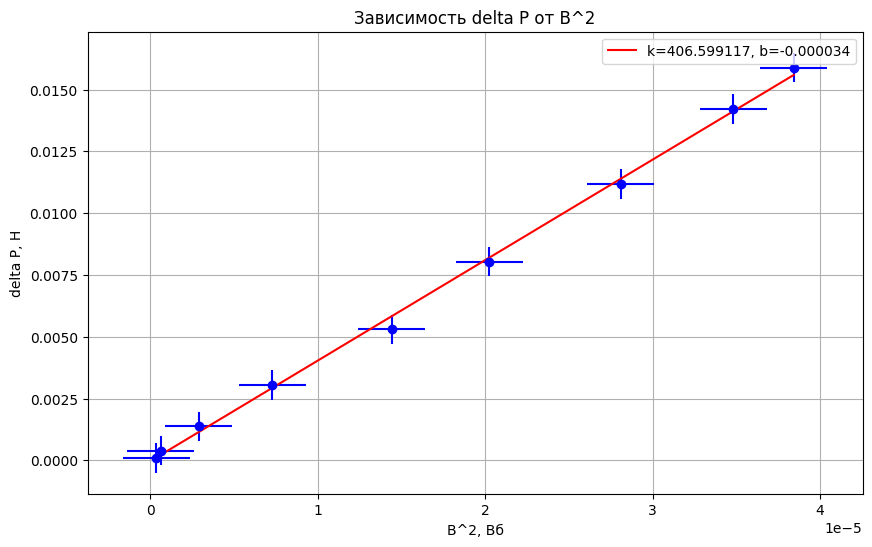

164470.24674483537


In [35]:
# data analise

x = [0.6, 0.8, 1.7, 2.7, 3.8, 4.5, 5.3, 5.9, 6.2]
x = [(t*(1e-3))**2 for t in x]
# y = [0,1,4,9,15,22,34,42,47]
# y = [-1, -2, -3, -5, -8, -12, -16, -20, -22]
# y = [-1, -5, -23, -47, -83, -127, -178, -229, -255]
y = [1, 4, 14, 31, 54, 82, 114, 145, 162]
y = [t*9.81*10e-6 for t in y]
plt.figure(figsize=(10,6))
plt.title('Зависимость delta P от B^2')
plt.xlabel('B^2, Вб')
plt.ylabel('delta P, Н')
plt.grid()
plt.errorbar(x, y, yerr=0.0006, xerr=0.000002, fmt='ob')
p=np.polyfit(x, y, 1)
# p = [p[0]+0.01, p[1]]
xx=np.linspace(min(x), max(x), 100)
yy=np.polyval(p, xx)
plt.plot(xx, yy, '-r', label=f'k={p[0]:.6f}, b={p[1]:.6f}')
plt.legend()
plt.savefig("./data/data4.png", bbox_inches='tight')
plt.show()
# gl1 = f'k={1/p[0]:.6f}'
# print(gl1)
# print(p)
print(sum([i**2 for i in y])/sum([i**2 for i in x]))

.
.
.
.
.
part of LaTex
.
.
.
.
.

In [157]:
# tables from  exel to LaTex



titles = []

# for column in titles:
#     data = df.to_latex
data = df.to_latex(index=False)
print(data)

\begin{tabular}{rrrr}
\toprule
I & U & psi without PI & nu \\
\midrule
265.000000 & 0.620700 & -1.570796 & 1150.000000 \\
242.000000 & 0.567900 & -1.481037 & 1460.500000 \\
215.000000 & 0.504200 & -1.454441 & 1854.835000 \\
186.000000 & 0.433900 & -1.285197 & 2355.640450 \\
157.000000 & 0.362500 & -1.196797 & 2991.663371 \\
129.000000 & 0.294700 & -1.094797 & 3799.412482 \\
105.000000 & 0.233800 & -0.966644 & 4825.253852 \\
84.000000 & 0.180900 & -0.822798 & 6128.072392 \\
66.800000 & 0.136400 & -0.646798 & 7782.651938 \\
0.521700 & 0.099800 & -0.483322 & 9883.967961 \\
39.580000 & 0.070100 & 0.000000 & 12552.639310 \\
29.320000 & 0.048400 & 0.196350 & 15941.851924 \\
20.260000 & 0.033000 & -0.565487 & 20246.151944 \\
11.850000 & 0.022400 & -0.942478 & 25712.612968 \\
3.700000 & 0.011300 & -1.151917 & 32655.018470 \\
\bottomrule
\end{tabular}

